## 9 classes

In [4]:
from src.classification import DataPreprocessor
from utils.visualization_utils import plot_confusion_matrix, plot_crop_predictions, plot_crop_type_count

from src.classification import ModelTrainer
from src.classification import PredictionConverter

from config.config import CSV_PATH, MODEL_PARAMS, MODEL_PATH, CROP_MAPPING


In [5]:
preprocessor = DataPreprocessor(CSV_PATH)
preprocessor.remove_band_10()
train_df, test_df = preprocessor.split_and_shuffle_data()

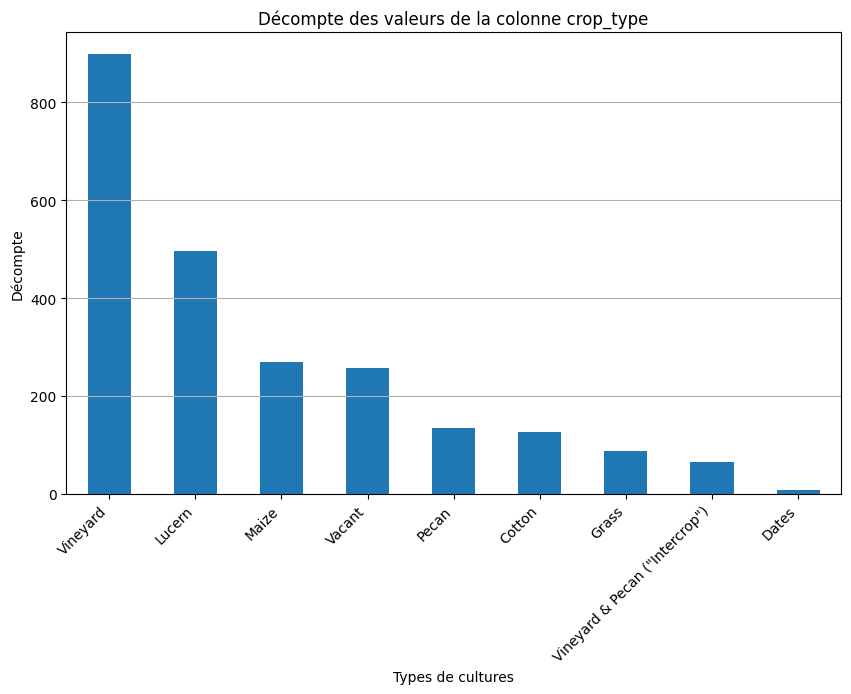

In [6]:

plot_crop_type_count(preprocessor.df)

In [6]:
trainer = ModelTrainer(MODEL_PARAMS)
trainer.prepare_train_test_data(train_df, test_df)
trainer.train_model()
trainer.evaluate_model()
# trainer.save_model(MODEL_PATH)

Train Accuracy: 0.9983629552830001
Test Accuracy: 0.7546939788071021
Classification Report for Test Data:


/Users/Hiba/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Hiba/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Hiba/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.86      0.76      0.81      7833
           2       0.00      0.00      0.00       549
           3       0.41      0.25      0.31      4107
           4       0.82      0.87      0.84     29824
           5       0.78      0.86      0.81     15474
           6       0.76      0.52      0.62     12261
           7       0.67      0.52      0.59     20020
           8       0.74      0.93      0.82     46411
           9       0.66      0.02      0.04      4606

    accuracy                           0.75    141085
   macro avg       0.63      0.53      0.54    141085
weighted avg       0.74      0.75      0.73    141085



In [7]:
test_predictions = trainer.rf_classifier.predict(trainer.X_test)
converter = PredictionConverter(test_df, test_predictions)
df_percentage = converter.calculate_predictions_percentage()
df_final = converter.calculate_final_predictions(test_df, df_percentage)

Accuracy  80.37%


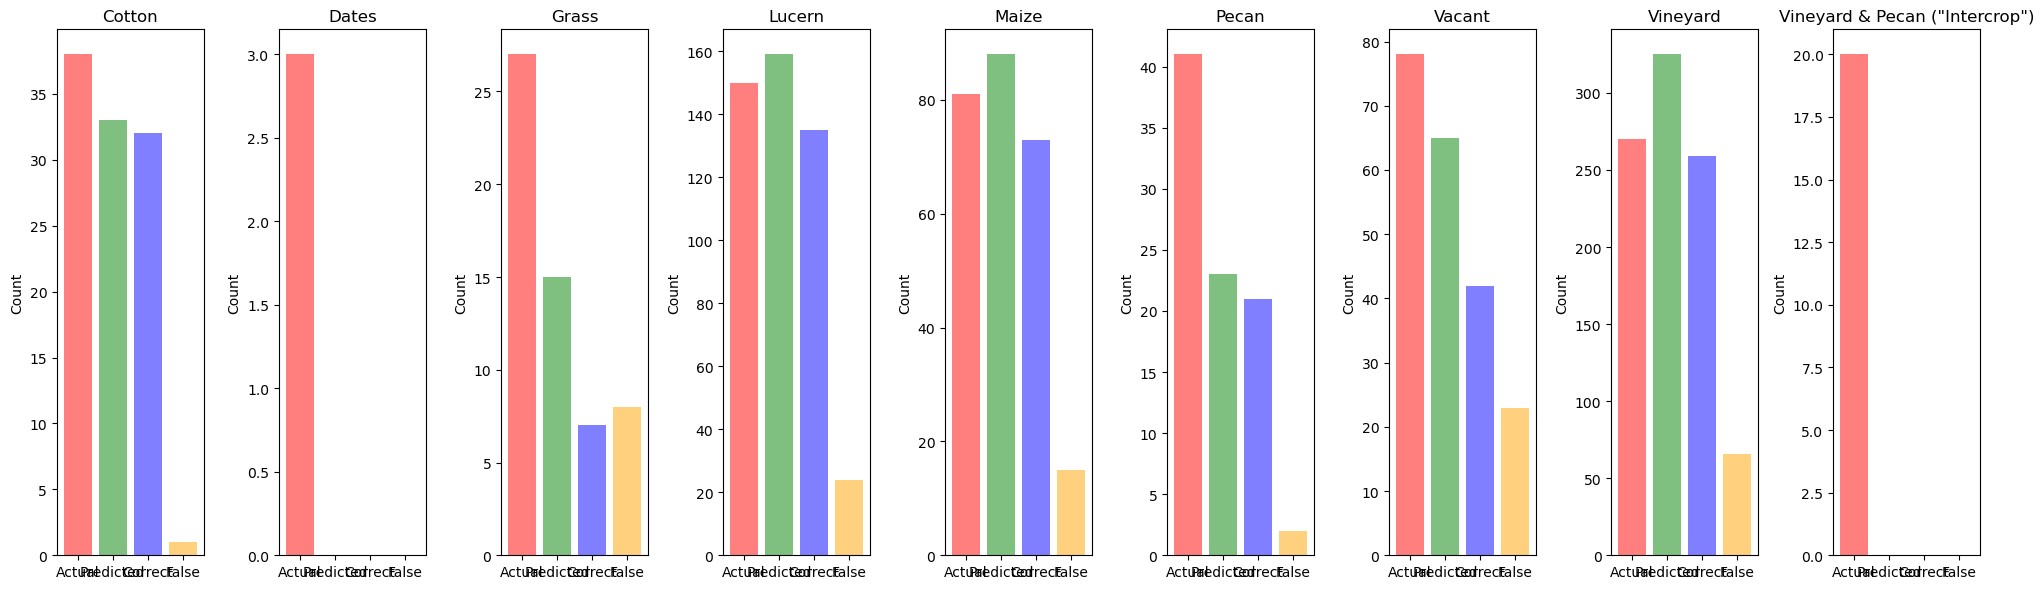

<Figure size 640x480 with 0 Axes>

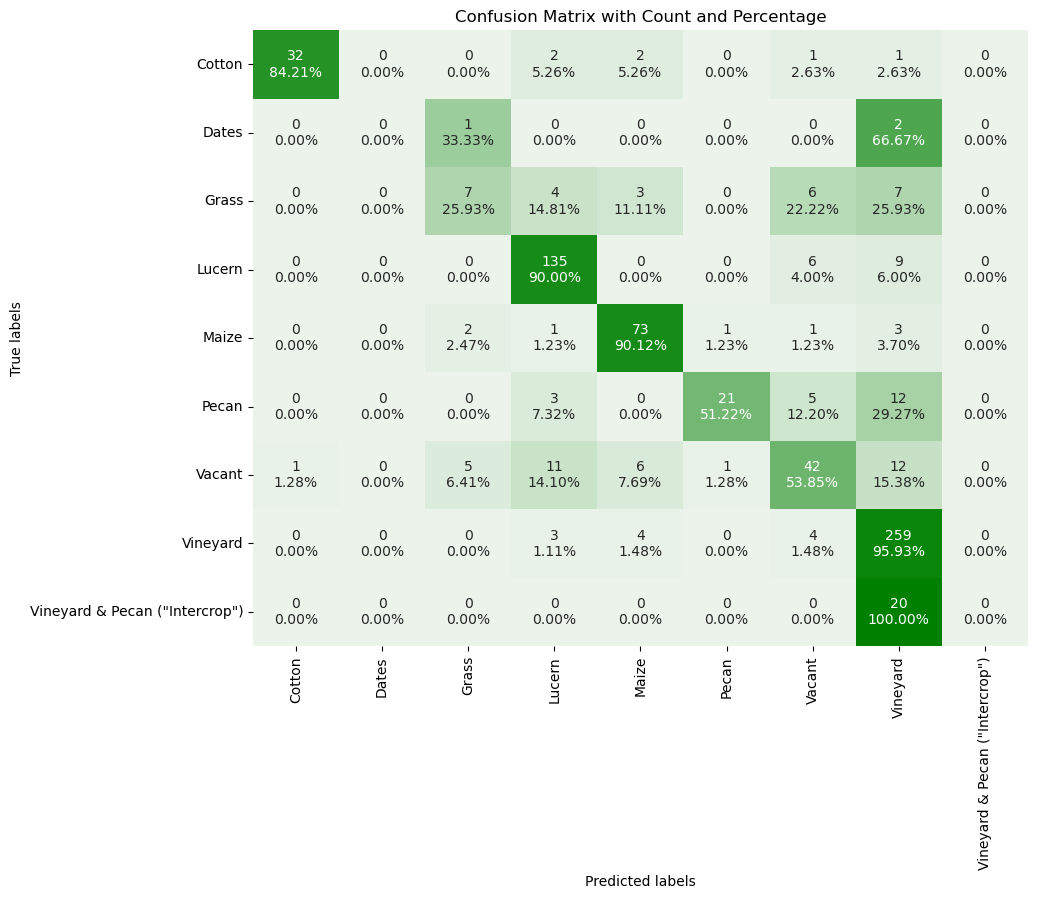

In [8]:

plot_crop_predictions(df_final['Crop_Id_Ne'], df_final['test_predictions'], CROP_MAPPING)
plot_confusion_matrix(df_final['Crop_Id_Ne'], df_final['test_predictions'], CROP_MAPPING)

## 6 classes , Pixel level

In [ ]:
from src.classification import DataPreprocessor
from utils.visualization_utils import plot_confusion_matrix, plot_crop_predictions, plot_crop_type_count

from src.classification import ModelTrainer
from src.classification import PredictionConverter

from config.config import CSV_PATH, MODEL_PARAMS, MODEL_PATH, CROP_MAPPING


In [ ]:
preprocessor = DataPreprocessor(CSV_PATH)
preprocessor.remove_band_10()
preprocessor.remove_and_merge_classes()
train_df, test_df = preprocessor.split_and_shuffle_data()

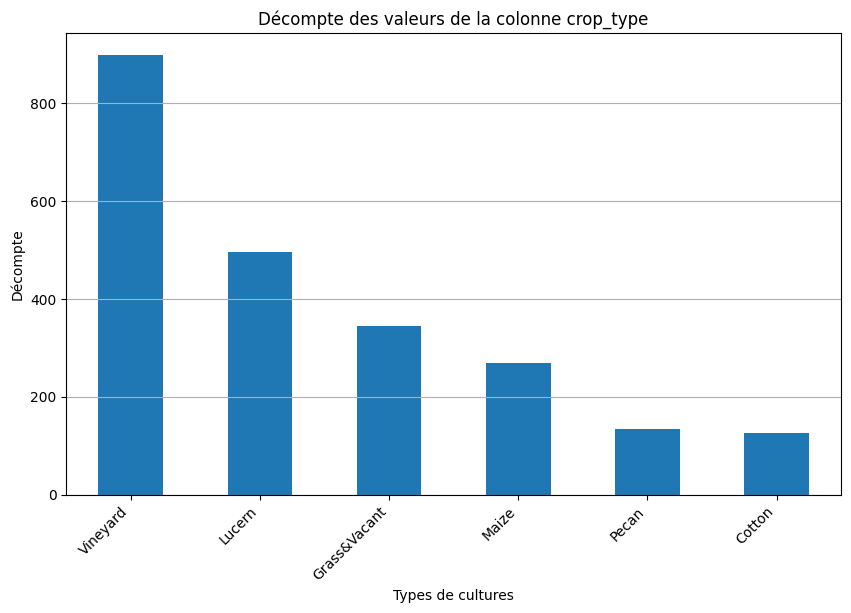

In [ ]:
plot_crop_type_count(preprocessor.df)

In [ ]:
trainer = ModelTrainer(MODEL_PARAMS)
trainer.prepare_train_test_data(train_df, test_df)
trainer.train_model()
trainer.evaluate_model()
# trainer.save_model(model_path)


Train Accuracy: 0.9999902269306699
Test Accuracy: 0.8289684578632944
Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.88      0.66      0.75      8630
           4       0.85      0.85      0.85     29299
           5       0.93      0.87      0.90     17539
           6       0.88      0.69      0.78     12099
           8       0.85      0.94      0.89     43666
          10       0.64      0.67      0.65     19164

    accuracy                           0.83    130397
   macro avg       0.84      0.78      0.80    130397
weighted avg       0.83      0.83      0.83    130397



: 

In [ ]:
parameter = trainer.save_model_params()
parameter

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

wandb: Network error (ConnectionError), entering retry loop.


In [ ]:
from joblib import load
trainer = ModelTrainer(MODEL_PARAMS)
trainer.prepare_train_test_data(train_df, test_df)
loaded_model = load(MODEL_PATH)
test_predictions = loaded_model.predict(trainer.X_test)


In [ ]:
#test_predictions = trainer.rf_classifier.predict(trainer.X_test)
converter = PredictionConverter(test_df, test_predictions)
df_percentage = converter.calculate_predictions_percentage()
df_final = converter.calculate_final_predictions(test_df, df_percentage)

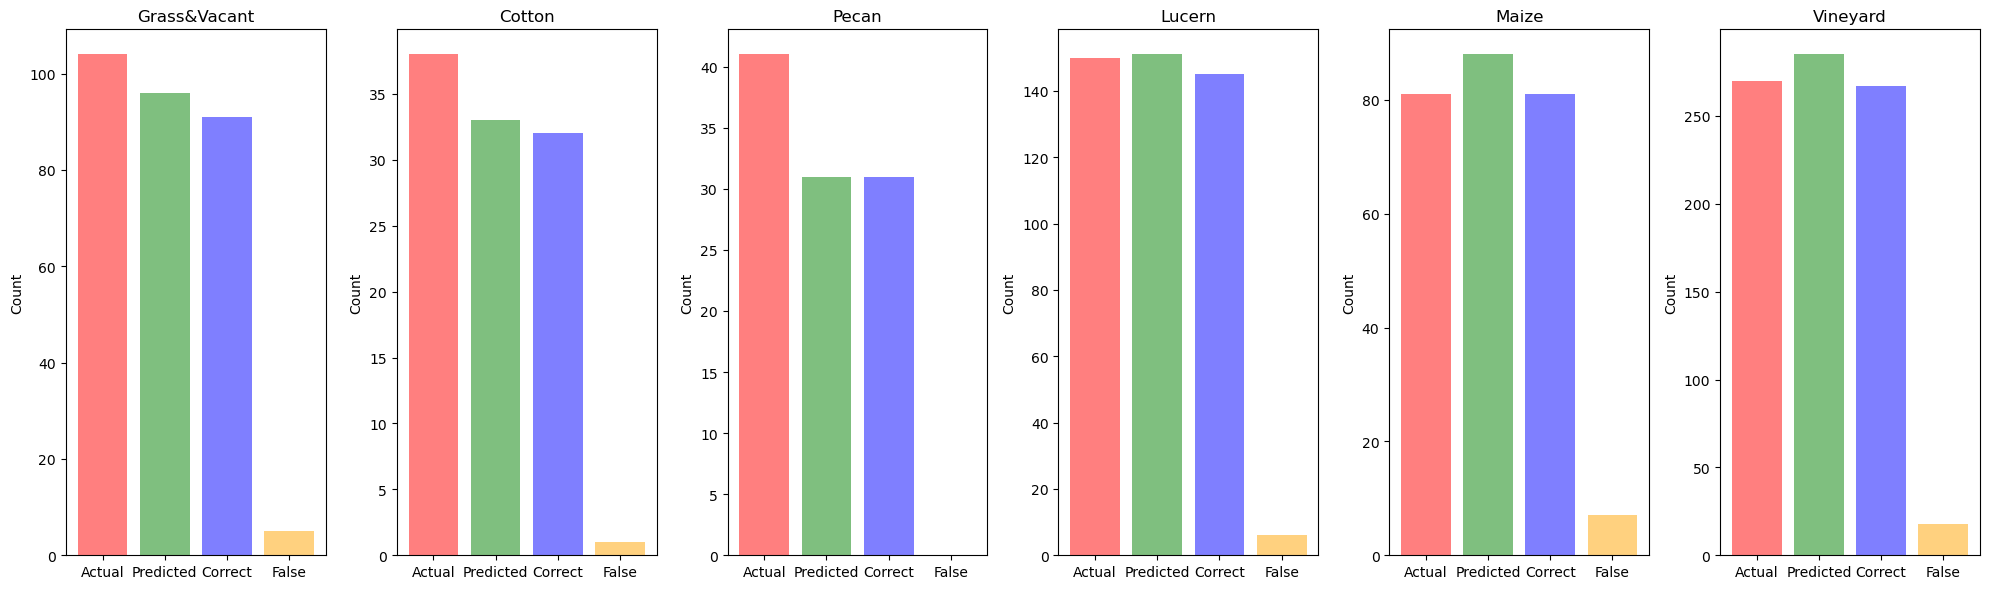

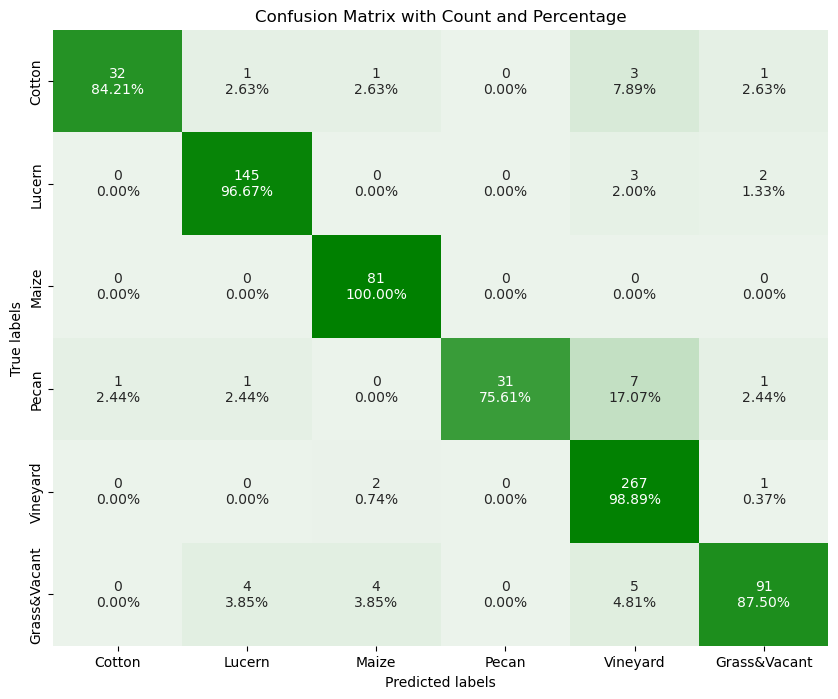

In [ ]:
plot_crop_predictions(df_final['Crop_Id_Ne'], df_final['test_predictions'], CROP_MAPPING)
plot_confusion_matrix(df_final['Crop_Id_Ne'], df_final['test_predictions'], CROP_MAPPING)

## Vineyard_pecan_intercrop

In [ ]:
from src.classification import DataPreprocessor
from utils.visualization_utils import plot_confusion_matrix, plot_crop_predictions, plot_crop_type_count

from src.classification import ModelTrainer
from src.classification import PredictionConverter

from config.config import CSV_PATH, MODEL_PARAMS, MODEL_PATH, CROP_MAPPING

In [ ]:
preprocessor = DataPreprocessor(CSV_PATH)
preprocessor.remove_band_10()
preprocessor.vineyard_intercrop()  # Appel de la fonction vineyard_intercrop
train_df, test_df = preprocessor.split_and_shuffle_data()

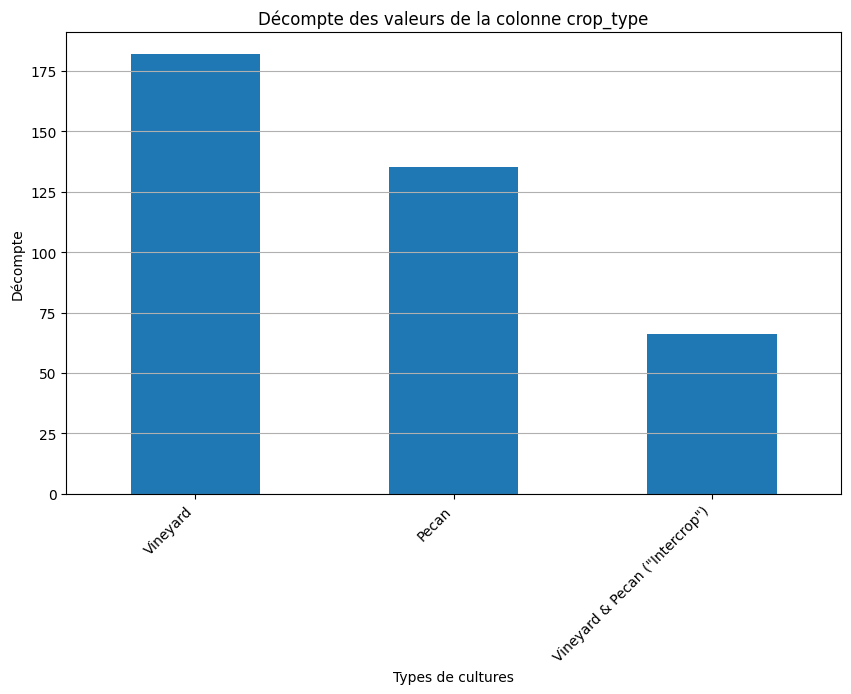

In [ ]:
plot_crop_type_count(preprocessor.df)

In [ ]:
trainer = ModelTrainer(MODEL_PARAMS)
trainer.prepare_train_test_data(train_df, test_df)
trainer.train_model()
trainer.evaluate_model()
trainer.save_model(MODEL_PATH)

In [ ]:
from joblib import load


trainer = ModelTrainer(MODEL_PARAMS)
trainer.prepare_train_test_data(train_df, test_df)
loaded_model = load(MODEL_PATH)
test_predictions = loaded_model.predict(trainer.X_test)


c:\Users\XPRISTO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.1.post1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\XPRISTO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.1.post1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
# test_predictions = trainer.rf_classifier.predict(trainer.X_test)
converter = PredictionConverter(test_df, test_predictions)
df_percentage = converter.calculate_predictions_percentage()
df_final = converter.calculate_final_predictions(test_df, df_percentage)


Accuracy  89.57%


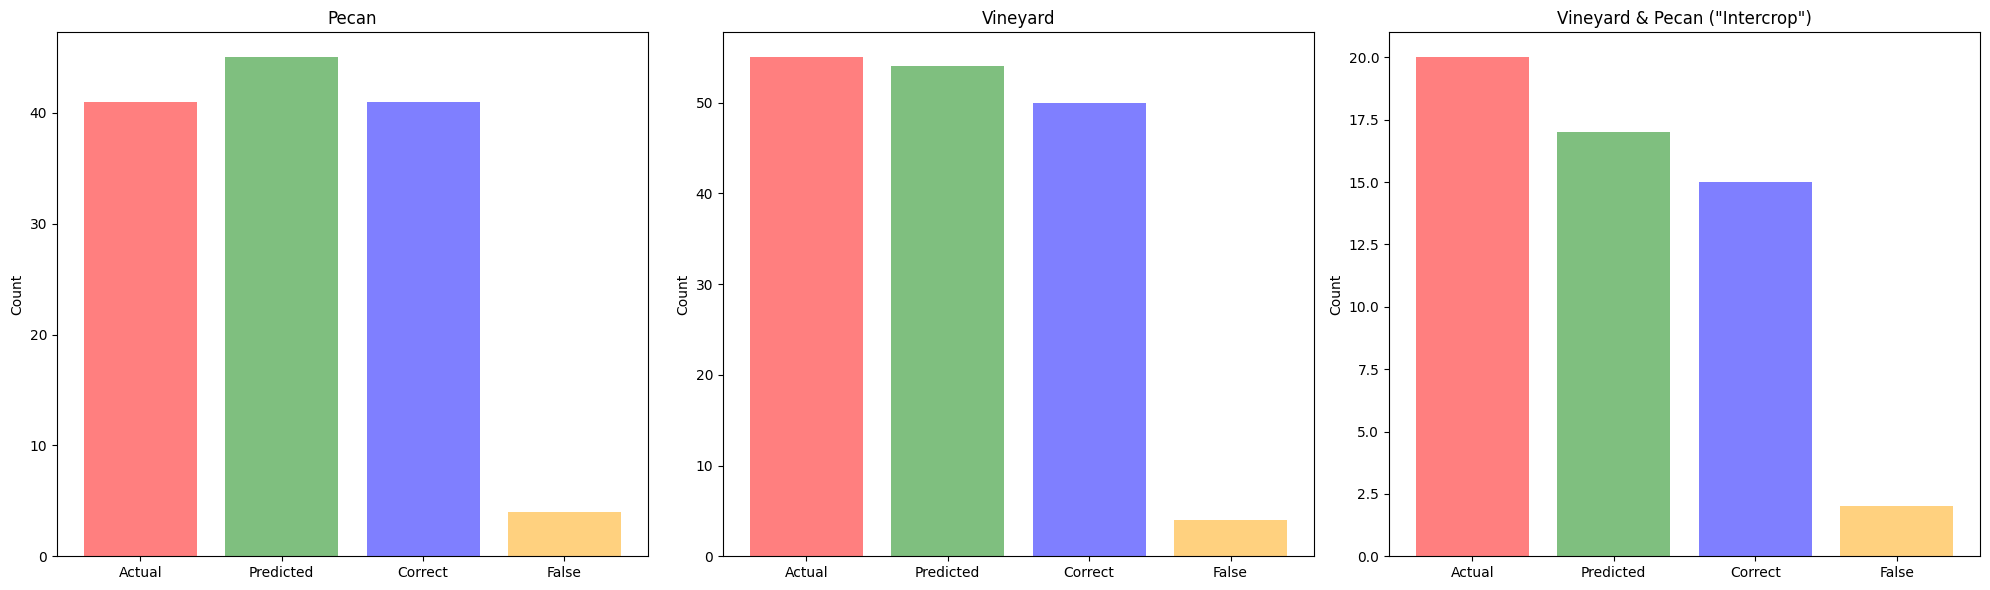

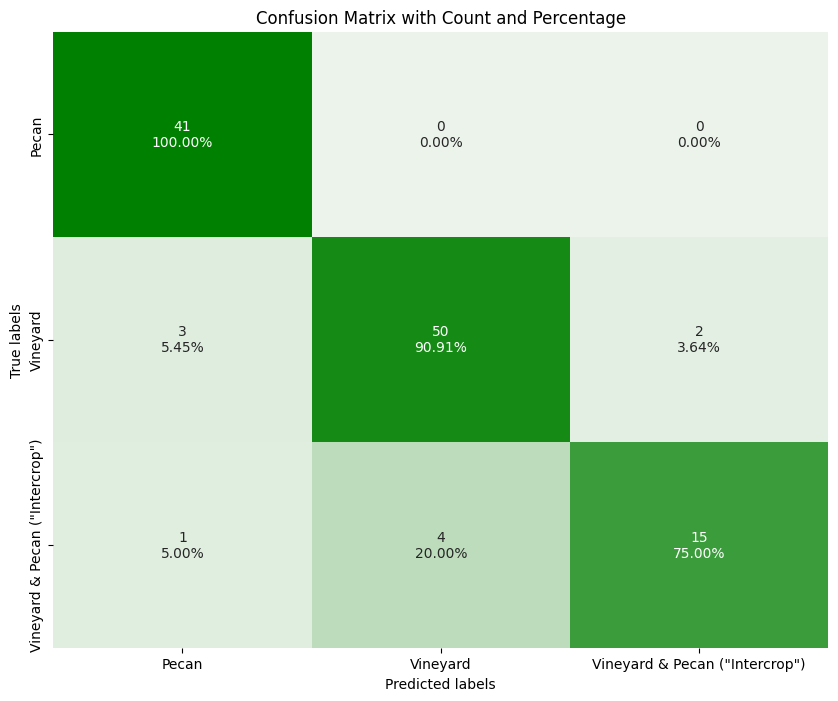

In [ ]:
plot_crop_predictions(df_final['Crop_Id_Ne'], df_final['test_predictions'], CROP_MAPPING)
plot_confusion_matrix(df_final['Crop_Id_Ne'], df_final['test_predictions'], CROP_MAPPING)

#### From pixel prediction to parcel prediction

In [ ]:
df = preprocessor.add_predictions_to_test_data(test_predictions, test_df)
df_percentage = preprocessor.process_predictions(df)

In [ ]:
df_percentage.head(20)

test_predictions,Field_Id,test_predictions,6,8,9
0,3498,6,45.901639,41.803279,12.295082
1,3505,6,100.000000,NaN,NaN
2,3455,6,100.000000,NaN,NaN
3,1884,8,1.282051,98.717949,NaN
4,3585,6,100.000000,NaN,NaN
5,2661,8,1.428571,98.142857,0.428571
6,1390,8,NaN,100.000000,NaN
7,3421,6,100.000000,NaN,NaN
8,1770,8,8.139535,86.337209,5.523256
9,3038,8,NaN,99.668874,0.331126


In [ ]:
df_final = preprocessor.create_final_dataframe(df_percentage,  test_df)

In [ ]:
accuracy = (df_final['Crop_Id_Ne'] == df_final['test_predictions']).mean() * 100
print("Accuracy  {:.2f}%".format(accuracy))

Accuracy  84.35%


In [ ]:
true_labels = df_final['Crop_Id_Ne']
predicted_labels = df_final['test_predictions']
if not (true_labels.dtype == int and predicted_labels.dtype == int):
    true_labels = true_labels.astype(int)
    predicted_labels = predicted_labels.astype(int)

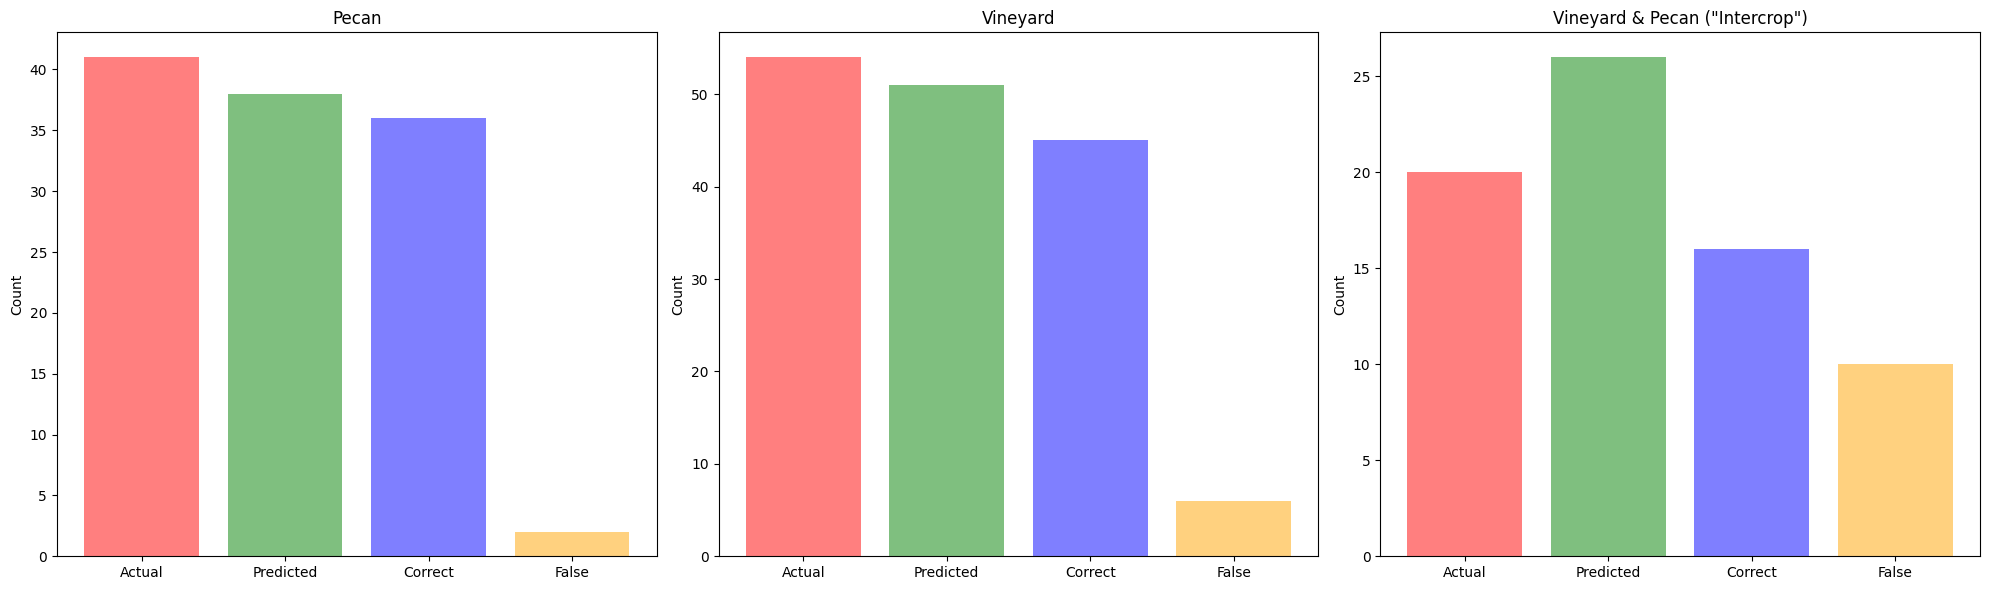

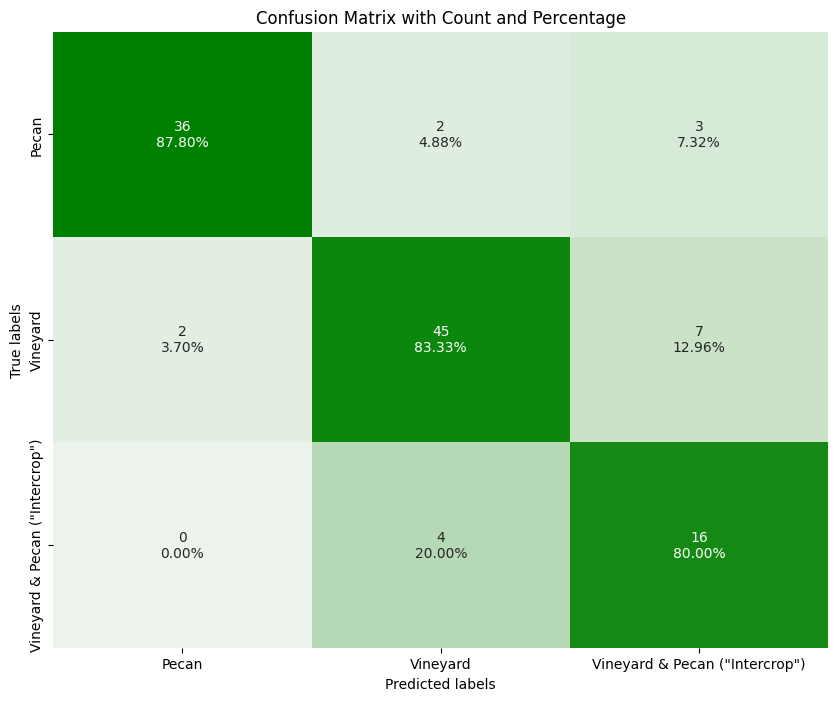

: 

In [ ]:
plot_crop_predictions(true_labels, predicted_labels, crop_mapping)
plot_confusion_matrix( true_labels, predicted_labels, crop_mapping )